In [26]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt

# 1. Supervised learning


## 1.1 Linear model

### 1.1.1 Define regression model (forward pass) and loss function.
Machine starts with **a random weight**.

In [32]:
w = 1.0 # Random guess

def forward(x): # Our model for the forward pass (prediction given the input)
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2

**Minimizing the loss is learning:**<br>
<center>$argmin_w loss(w)$</center>

### 1.1.2 Compute loss for `w`

w= 0.0
	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.6666666667
w= 0.1
	 1.0 2.0 0.1 3.61
	 2.0 4.0 0.2 14.44
	 3.0 6.0 0.3 32.49
MSE= 16.8466666667
w= 0.2
	 1.0 2.0 0.2 3.24
	 2.0 4.0 0.4 12.96
	 3.0 6.0 0.6 29.16
MSE= 15.12
w= 0.3
	 1.0 2.0 0.3 2.89
	 2.0 4.0 0.6 11.56
	 3.0 6.0 0.9 26.01
MSE= 13.4866666667
w= 0.4
	 1.0 2.0 0.4 2.56
	 2.0 4.0 0.8 10.24
	 3.0 6.0 1.2 23.04
MSE= 11.9466666667
w= 0.5
	 1.0 2.0 0.5 2.25
	 2.0 4.0 1.0 9.0
	 3.0 6.0 1.5 20.25
MSE= 10.5
w= 0.6
	 1.0 2.0 0.6 1.96
	 2.0 4.0 1.2 7.84
	 3.0 6.0 1.8 17.64
MSE= 9.14666666667
w= 0.7
	 1.0 2.0 0.7 1.69
	 2.0 4.0 1.4 6.76
	 3.0 6.0 2.1 15.21
MSE= 7.88666666667
w= 0.8
	 1.0 2.0 0.8 1.44
	 2.0 4.0 1.6 5.76
	 3.0 6.0 2.4 12.96
MSE= 6.72
w= 0.9
	 1.0 2.0 0.9 1.21
	 2.0 4.0 1.8 4.84
	 3.0 6.0 2.7 10.89
MSE= 5.64666666667
w= 1.0
	 1.0 2.0 1.0 1.0
	 2.0 4.0 2.0 4.0
	 3.0 6.0 3.0 9.0
MSE= 4.66666666667
w= 1.1
	 1.0 2.0 1.1 0.81
	 2.0 4.0 2.2 3.24
	 3.0 6.0 3.3 7.29
MSE= 3.78
w= 1.2
	 1.0 2.0 1.2 0.64
	 2.0

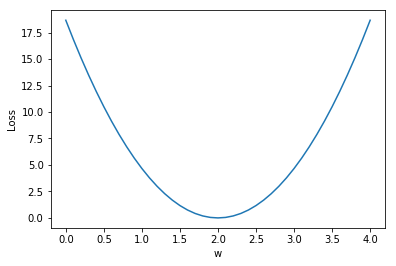

In [33]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]


w = 1.0

w_list = []
mse_list = []
for w in np.arange(0.0, 4.1, 0.1):
    print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        y_pred_val = forward(x_val)
        l = loss(x_val, y_val)
        l_sum += l
        print("\t", x_val, y_val, y_pred_val, l)
        
    print("MSE=", l_sum/3) # The mean of loss (we have three features in our example)
    w_list.append(w)
    mse_list.append(l_sum/3)
    
# print(mse_list)
plt.plot(w_list, mse_list)
plt.ylabel("Loss")
plt.xlabel("w")
plt.show()

## 1.2 Gradient descent

Gradient descent is a way to **update weight.** You calculate **the gradient of the model** you use to predict. If gradient is:
1. negative, you increase the weight.
2. positive, you decrease the weight.

<center>$w = w - \alpha \frac{\delta loss}{\delta w}$</center>

In [46]:
def gradient(x, y):
    return 2*x*(x*w - y)

In [47]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0 # Random guess

def forward(x): # Our model for the forward pass (prediction given the input)
    return x*w

def loss(x,y):
    y_pred = forward(x)
    return (y_pred - y)**2

# Before training
print("predict (before training)", 4, forward(4))

# Training loop
for epoch in range(100): # epoch: how many times are we going to update weight
    for x_val, y_val in zip(x_data, y_data):
        grad = gradient(x_val, y_val)
        w = w - 0.01*grad # learning rate = 0.01
        print("\tgrad: ", x_val, y_val, grad)
        l = loss(x_val, y_val)
        
    print("progress:", epoch, "w=", w, "loss=", l)
    
# After training
print("predict (after training)", "4 hours", forward(4))
        
    

predict (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.2288
progress: 0 w= 1.260688 loss= 4.919240100095999
	grad:  1.0 2.0 -1.478624
	grad:  2.0 4.0 -5.796206079999999
	grad:  3.0 6.0 -11.998146585599997
progress: 1 w= 1.453417766656 loss= 2.688769240265834
	grad:  1.0 2.0 -1.093164466688
	grad:  2.0 4.0 -4.285204709416961
	grad:  3.0 6.0 -8.87037374849311
progress: 2 w= 1.5959051959019805 loss= 1.4696334962911515
	grad:  1.0 2.0 -0.8081896081960389
	grad:  2.0 4.0 -3.1681032641284723
	grad:  3.0 6.0 -6.557973756745939
progress: 3 w= 1.701247862192685 loss= 0.8032755585999681
	grad:  1.0 2.0 -0.59750427561463
	grad:  2.0 4.0 -2.3422167604093502
	grad:  3.0 6.0 -4.848388694047353
progress: 4 w= 1.7791289594933983 loss= 0.43905614881022015
	grad:  1.0 2.0 -0.44174208101320334
	grad:  2.0 4.0 -1.7316289575717576
	grad:  3.0 6.0 -3.584471942173538
progress: 5 w= 1.836707389300983 loss= 0.2399802903801062
	grad:  1.0 2.0 -0.3265852213980338
	grad:  2

## 1.3 Backpropagation

Use `Variable` to compute gradient.
All the operation on `Variable` will construct a computational graph. You should claim it using `requires_grad` local argument.

<center>`x = Variable(tc.ones(3,3), requires_grad=True)`</center>

With computational graph, you can perform `backward()` on it to compute gradient. You can use the gradient with respect to a `Variable` using `Variable.grad.data`.

You can return the value of `Variable` using `Variable.data`.

In [94]:
import torch as tc
from torch.autograd import Variable

def forward_pass(x_val):
    return w*x_val

def loss(x_val, y_val):
    return (forward_pass(x_val) - y_val)**2

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = Variable(tc.Tensor([1.0]), requires_grad = True)

for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        # 1. Run through forward pass
        l = loss(x_val, y_val)
        # 2. Calculate backprop
        l.backward()
        # 3. Update weight
        w.data = w.data - 0.01*w.grad.data
        # IMPORTANT: Initialize our gradient by manually making the gradient zero after updating weight
        w.grad.data.zero_()
print(w)

Variable containing:
 2.0000
[torch.FloatTensor of size 1]

